In [2]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd
from convolution import *


In [3]:
# Load data
data = pkl.load(open("../data/usps.pkl", "rb"))

X_train = np.array(data["X_train"], dtype=float).reshape(-1, 16 * 16, 1)
X_test = np.array(data["X_test"], dtype=float).reshape(-1, 16 * 16, 1)
# X_train = np.array(data["X_train"], dtype=float)
# X_test = np.array(data["X_test"], dtype=float)
# X_train = X_train[:, :, np.newaxis]
Y_train = data["Y_train"]
Y_test = data["Y_test"]
def one_hot(y):
    y_one_hot = np.zeros((y.shape[0], 10))
    y_one_hot[np.arange(y.shape[0]), y] = 1
    return y_one_hot


Y_train = one_hot(Y_train)
Y_test = one_hot(Y_test)

In [7]:
net = Sequential(
    [Conv1D(3, 1, 32),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(4064, 100),
    ReLU(),
    Linear(100, 10)]
)
loss = CrossEntropyLoss()




In [8]:
Lerror, Lscore= SGD(net, loss, X_train, Y_train, predict= lambda x : np.argmax(net.forward(x),axis = 1), xtest = X_test, ytest = np.argmax(Y_test,axis =1), batch_size=10, max_iter=100, eps =0.001)


Epoch: 0 / 100
Loss  0.678
score  0.601
Epoch: 1 / 100
Loss  0.57
score  0.742
Epoch: 2 / 100
Loss  0.503
score  0.794
Epoch: 3 / 100
Loss  0.46
score  0.831
Epoch: 4 / 100
Loss  0.433
score  0.86
Epoch: 5 / 100
Loss  0.413
score  0.875
Epoch: 6 / 100
Loss  0.393
score  0.877
Epoch: 7 / 100
Loss  0.379
score  0.883
Epoch: 8 / 100
Loss  0.37
score  0.89
Epoch: 9 / 100
Loss  0.363
score  0.894
Epoch: 10 / 100
Loss  0.353
score  0.896
Epoch: 11 / 100
Loss  0.35
score  0.9
Epoch: 12 / 100
Loss  0.34
score  0.902
Epoch: 13 / 100
Loss  0.336
score  0.903
Epoch: 14 / 100
Loss  0.331
score  0.905
Epoch: 15 / 100
Loss  0.328
score  0.907
Epoch: 16 / 100
Loss  0.323
score  0.908
Epoch: 17 / 100
Loss  0.321
score  0.91
Epoch: 18 / 100
Loss  0.319
score  0.91
Epoch: 19 / 100
Loss  0.315
score  0.909
Epoch: 20 / 100
Loss  0.313
score  0.911
Epoch: 21 / 100
Loss  0.312
score  0.912
Epoch: 22 / 100
Loss  0.309
score  0.912
Epoch: 23 / 100
Loss  0.309
score  0.913
Epoch: 24 / 100
Loss  0.305
score  0.

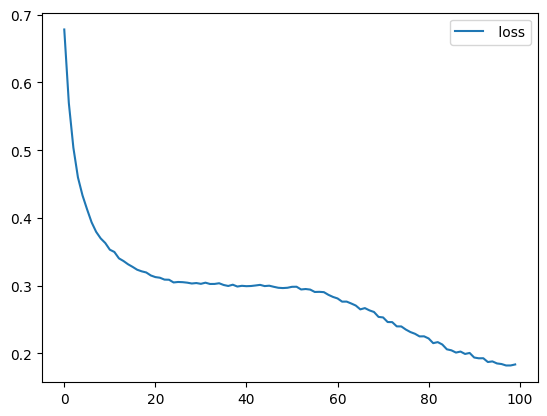

In [9]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()

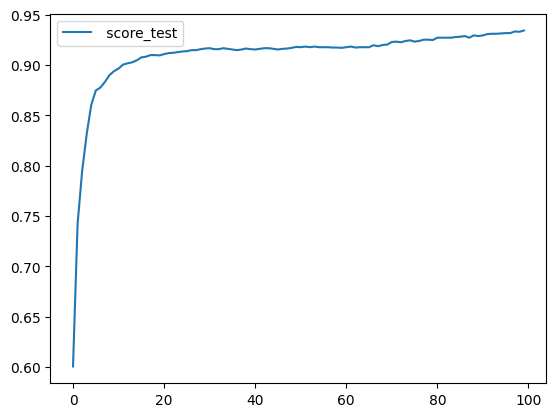

In [10]:
plt.plot(Lscore,label =' score_test')
plt.legend()
plt.show()


3